<a href="https://colab.research.google.com/github/MoseAIML/Moses-/blob/main/Copy_of_Project_Twitter_Sentiment_Analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install googletrans
!pip install emot
!pip install deep_translator
!pip install transformers

In [ ]:
#Importing the libraries

import tweepy as tw
import pandas as pd
import numpy as np
from textblob import TextBlob
from wordcloud import WordCloud
from matplotlib import pyplot as plt 
import re 
import googletrans
from emot.emo_unicode import UNICODE_EMOJI
from emot.emo_unicode import EMOTICONS_EMO
from deep_translator import GoogleTranslator
import nltk
nltk.download('stopwords')


#tweepy: ‘Tweepy’ allows us to access Twitter API.
#re: ‘Regular Expression’ allows us to check if a specified string and a given regular expression match.
#numpy: ‘NumPy’ allows us to work with arrays.
#matplotlib.pyplot: ‘Matplotlib’ allows us to visualize data in multiple ways.
#pandas: ‘Pandas’ is used to work with data to analyze it.
#NLTK is a library which gives an easy access to a lot of lexical resources 
#and allows users to work with categorization, classification and many other tasks.
#textblob: ‘TextBlob’ allows us to process textual data for NLP.
#WordCloud:It is a data visualization technique used for representing text data in which the size of each word 
#indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud. 
#Word clouds are widely used for analyzing data from social network websites
#The stopwords in nltk are the most common words in data. 
#They are words that you do not want to use to describe the topic of your content. 
#They are pre-defined and cannot be removed.
#Deep Translator is a flexible free and unlimited tool to translate between different languages
# in a simple way using multiple translators.
#Transformers -->Transformers provides APIs and tools to easily download and train state-of-the-art pretrained models. 
#Using pretrained models can reduce your compute costs, carbon footprint, 
#and save you the time and resources required to train a model from scratch. 
#These models support common tasks in different modalities such as NLP, Computer Vison, Audio and Multimodal
#They also support framework interoperability between PyTorch, TensorFlow, and JAX. 
#This provides the flexibility to use a different framework at each stage of a model’s life; 
#train a model in three lines of code in one framework, and load it for inference in another



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

**Twitter Sentiment Analysis**

In [ ]:
#Login Credentials
#Defining Consumer Key, Consumer Secret, Access Token, and Access Token Secret. 
#Found in Twitter Developer Account. 
#All unique values for every individual

consumer_key = '0mV4RqVCsVXLJNj0CIp50sJFN'
consumer_secret = '3kurw4NzHjPAGZOaMhk0lhtYatJ8cEQggV4gEGwWk0Cad5ZO3V'
access_token = '1715209393-wTARFo1j4LbQhZxwR6F3gQtPKqaUkYOkdnuo2XG'
access_token_secret = 'nUprIIUb4KSkftC8Eb7QHiqFWDs5fnueSTRhiV5gNlKW1'


In [ ]:
# API Creation
 #Accessing Twitter Data
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

In [ ]:
#webscrapping tweets based on hashtag variable
hashtag = 'safaricom OR @safaricom OR #safaricom -filter:retweets  -from:Safaricom_Care OR SafaricomPLC'
query = tw.Cursor(api.search, q=hashtag, result_type="recent").items(1000)
tweets = [{'tweets':tweet.text, 'timestamp':tweet.created_at}for tweet in query]
print(tweets)

[{'tweets': 'bado kuna mtu ana dai kuni corn na mpesa balance ni 235 \n#FellowKenyans\n@Kot \n@Safaricom_Care \nbeware of conmen \n# 333', 'timestamp': datetime.datetime(2023, 2, 21, 6, 12, 7)}, {'tweets': '@KenyaPower_Care Meter No:54607520928\nError 06.....then it connects,then it fails.\n0712-482875\nKamenu,Makongeni Thi… https://t.co/7zsQ72cbmV', 'timestamp': datetime.datetime(2023, 2, 21, 6, 11, 47)}, {'tweets': '@Safaricom_Care check Dm', 'timestamp': datetime.datetime(2023, 2, 21, 6, 9, 27)}, {'tweets': 'Safaricom Ethiopia: "We are in discussions with the Ministry of Finance (MoF) to agree on the terms &amp; conditions of… https://t.co/Wk5amSM91t', 'timestamp': datetime.datetime(2023, 2, 21, 6, 6, 24)}, {'tweets': "@Safaricom_Care It's a very poor decision made, how comes the relocation is being done during business hours. Next… https://t.co/QkDwS5VxJF", 'timestamp': datetime.datetime(2023, 2, 21, 6, 6, 5)}, {'tweets': '@Biancawamu2 Haki walai hata wale wa kuuza mkopa za safaric

In [ ]:
#creating dataframe from tweets dictionary
df = pd.DataFrame.from_dict(tweets)
df.tail(15)

,tweets,timestamp
985,"@geenow_jereh @safaricom Hello, Kindly share y...",2023-02-18 12:21:28
986,"@SafaricomPLC Dear safaricom team,my name is S...",2023-02-18 12:16:23
987,@dcijuja @Safaricom_Care mnajenga?,2023-02-18 12:11:32
988,"@SafaricomPLC Hello Safaricom,I bought safaric...",2023-02-18 12:06:52
989,@safaricom care nlikua nadai kama naeza revers...,2023-02-18 12:06:07
990,@Safaricom_Care I couldn't register for an esi...,2023-02-18 12:05:55
991,@Ruets4 Kuna hii offer ya safaricom ya 2bob 200mb,2023-02-18 12:05:43
992,@Safaricom_Care Web! Tried even purchasing air...,2023-02-18 11:58:40
993,@Safaricom_Care Thank you.,2023-02-18 11:54:39
994,@SafaricomPLC &amp; @Safaricom_Care should i a...,2023-02-18 11:53:47


In [ ]:
from deep_translator import GoogleTranslator
def translator(text):
    return GoogleTranslator(source='sw',target='en').translate(text) #Swahili to English

In [ ]:
df['translated'] = df['tweets'].apply(translator)
df.tail(15)

,tweets,timestamp,translated
985,"@geenow_jereh @safaricom Hello, Kindly share y...",2023-02-18 12:21:28,"@geenow_jereh @safaricom Hello, Kindly share y..."
986,"@SafaricomPLC Dear safaricom team,my name is S...",2023-02-18 12:16:23,"@SafaricomPLC Dear safaricom team, my name is ..."
987,@dcijuja @Safaricom_Care mnajenga?,2023-02-18 12:11:32,@dcijuja @Safaricom_Care are you building?
988,"@SafaricomPLC Hello Safaricom,I bought safaric...",2023-02-18 12:06:52,"@SafaricomPLC Hello Safaricom, I bought safari..."
989,@safaricom care nlikua nadai kama naeza revers...,2023-02-18 12:06:07,@safaricom care I used to claim if I were to r...
990,@Safaricom_Care I couldn't register for an esi...,2023-02-18 12:05:55,@Safaricom_Care I couldn't register for an esi...
991,@Ruets4 Kuna hii offer ya safaricom ya 2bob 200mb,2023-02-18 12:05:43,@Ruets4 There is this safaricom offer of 2bob ...
992,@Safaricom_Care Web! Tried even purchasing air...,2023-02-18 11:58:40,@Safaricom_Care Web! Tried even purchasing air...
993,@Safaricom_Care Thank you.,2023-02-18 11:54:39,@Safaricom_Care Thank you.
994,@SafaricomPLC &amp; @Safaricom_Care should i a...,2023-02-18 11:53:47,@SafaricomPLC &amp; @Safaricom_Care should I l...


In [ ]:
df.tail(20)

,tweets,timestamp,translated
980,"@Safaricom_Care hey,its my birthday guys.Hoped...",2023-02-18 12:26:09,"@Safaricom_Care hey,its my birthday guys.Hoped..."
981,There’s an LOS on safaricom home Fibre account...,2023-02-18 12:23:49,There's an LOS on safaricom home Fiber account...
982,Mtu wa Kwanza kujua hii gearbox ni ya gari gan...,2023-02-18 12:22:35,The first person to know which car this gearbo...
983,@Safaricom_Care How long should this take?,2023-02-18 12:22:31,@Safaricom_Care How long should this take?
984,*Safaricom announces hit off on ⁷ps://l.kphx.n...,2023-02-18 12:21:32,*Safaricom announces hit off on ⁷ps://l.kphx.n...
985,"@geenow_jereh @safaricom Hello, Kindly share y...",2023-02-18 12:21:28,"@geenow_jereh @safaricom Hello, Kindly share y..."
986,"@SafaricomPLC Dear safaricom team,my name is S...",2023-02-18 12:16:23,"@SafaricomPLC Dear safaricom team, my name is ..."
987,@dcijuja @Safaricom_Care mnajenga?,2023-02-18 12:11:32,@dcijuja @Safaricom_Care are you building?
988,"@SafaricomPLC Hello Safaricom,I bought safaric...",2023-02-18 12:06:52,"@SafaricomPLC Hello Safaricom, I bought safari..."
989,@safaricom care nlikua nadai kama naeza revers...,2023-02-18 12:06:07,@safaricom care I used to claim if I were to r...


In [ ]:
#removing hashtags by using Regular Expression (ReGex) Each character assigned a vector
import nltk 
from nltk.tokenize import RegexpTokenizer

def hashtags(text):
    text = re.sub(r'#', '', text) #remove'#' symbol
    return text

In [ ]:
#translate emojis
from emot.emo_unicode import UNICODE_EMOJI, EMOTICONS_EMO 
def emoji(text):
    for emot in UNICODE_EMOJI:
        if text == None:
            text = text
    else:
        text = text.replace(emot, "_".join(UNICODE_EMOJI[emot].replace(",", "").replace(":", "").split()))
        return text

In [ ]:
#removing username and @
def remove_username(text):
    text = re.sub('(@[A-Za-z]+[A-Za-z0-9-_]+)', '', text)
    return text

In [ ]:
#removing irrelevant links
def remove_links(text):
    text = re.sub(r'http\S+', '', text) #removing http
    text = re.sub(r'bit.ly/\S+', '', text) #removing text
    text = text.strip('[link]') #removing [links]
    return text

def clean_html(text):
    html = re.compile('<.*?>') #regex
    return html.sub(r' ', text)

In [ ]:
def lowercase(text):
    return text.lower()

In [ ]:
#removing email adresses and punctuation in text
def remove_email(text):
    email = re.compile(r'[\w\.-]+@[\w\.-]+')
    return email.sub(r'', text)

def remove_punct(text):
    token = RegexpTokenizer(r'\w+') #regex
    text = token.tokenize(text)
    text = " ".join(text)
    return text 

In [ ]:
def remove_stopwords(text):
    #selecting english stopwords
    stopwords = nltk.corpus.stopwords.words('english')
    
    #adding custom stopwords
    #new_stopwords = ["safaricom", "Safaricom"] #list of custom stopwords
    #stopwords.extend(new_stopwords)
    
    #removing stopwords
    new_text = ' '.join([word for word in text.split() if word not in stopwords])
    return new_text

In [ ]:
#removing special characters
def remove_specialchar(text):
    text = re.sub('([_]+)', "", text)
    return text

In [ ]:
df['clean_tweets'] = df['translated'].apply(hashtags)
df['clean_tweets'] = df['clean_tweets'].apply(emoji)
df['clean_tweets'] = df['clean_tweets'].apply(remove_username)
df['clean_tweets'] = df['clean_tweets'].apply(remove_username)
df['clean_tweets'] = df['clean_tweets'].apply(clean_html)
df['clean_tweets'] = df['clean_tweets'].apply(remove_links)
df['clean_tweets'] = df['clean_tweets'].apply(lowercase)
df['clean_tweets'] = df['clean_tweets'].apply(remove_email)
df['clean_tweets'] = df['clean_tweets'].apply(remove_punct)
df['clean_tweets'] = df['clean_tweets'].apply(remove_stopwords)
df['clean_tweets'] = df['clean_tweets'].apply(remove_specialchar)
df.head(12)

,tweets,timestamp,translated,clean_tweets
0,bado kuna mtu ana dai kuni corn na mpesa balan...,2023-02-21 06:12:07,There is still someone who has a claim for cor...,still someone claim corn balance 235 fellowken...
1,@KenyaPower_Care Meter No:54607520928\nError 0...,2023-02-21 06:11:47,@KenyaPower_Care Meter No:54607520928\nError 0...,meter 54607520928 error 06 connects fails 0712...
2,@Safaricom_Care check Dm,2023-02-21 06:09:27,@Safaricom_Care check Dm,check dm
3,"Safaricom Ethiopia: ""We are in discussions wit...",2023-02-21 06:06:24,"Safaricom Ethiopia: ""We are in discussions wit...",safaricom ethiopia discussions ministry financ...
4,@Safaricom_Care It's a very poor decision made...,2023-02-21 06:06:05,@Safaricom_Care It's a very poor decision made...,poor decision made come relocation done busine...
5,@Biancawamu2 Haki walai hata wale wa kuuza mko...,2023-02-21 06:04:45,"@Biancawamu2 Haki walai, even those who sell s...",haki walai even sell safaricom loans still cal...
6,@SangKip4 @VinceChepkwony Subscription imeisha...,2023-02-21 06:04:29,@SangKip4 @VinceChepkwony Subscription has end...,subscription ended like safaricom data
7,@Safaricom_Care Big heads!,2023-02-21 06:00:24,@Safaricom_Care Big heads!,big heads
8,"@Safaricom_Care Done, check DM",2023-02-21 05:59:27,"@Safaricom_Care Done, check DM",done check dm
9,@SafaricomPLC \n@Safaricom_Care \n\nServices o...,2023-02-21 05:59:03,@SafaricomPLC\n@Safaricom_Care\n\nServices of ...,services mpesa agents locked notice given acti...


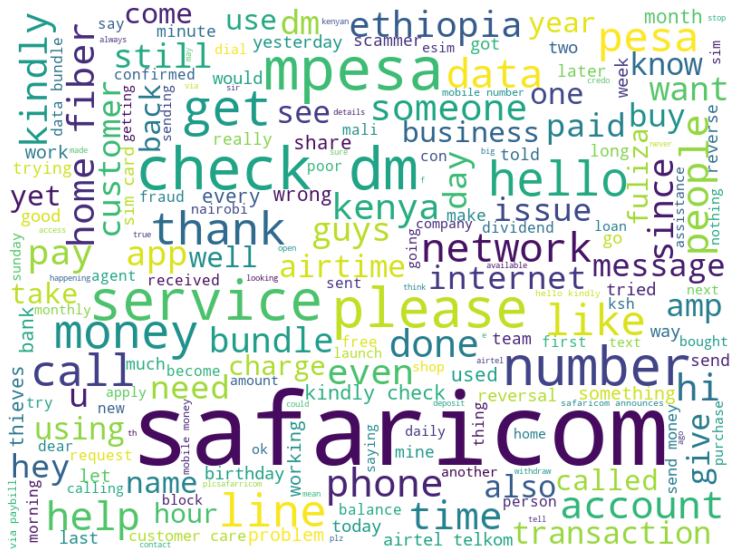

In [ ]:
allwords = ' '.join([twts for twts in df['clean_tweets']])
stopwords = nltk.corpus.stopwords.words('english')
#stopwords = stopwords

#WordCloud:Data visualization technique used for representing text data in which the size of each word 
#indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud. 
#Word clouds are widely used for analyzing data from social network websites

wordcloud = WordCloud(stopwords=stopwords, background_color="white", width=800, height=600).generate(allwords)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear') 
plt.axis("off")
plt.show()

In [ ]:
#Transformers:Transformers provides APIs and tools to easily download and train state-of-the-art pretrained models.

from transformers import AutoModelForSequenceClassification
from transformers import TFAutoModelForSequenceClassification
from transformers import AutoTokenizer, AutoConfig
import torch

In [ ]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment-latest"  #Name of the model
tokenizer = AutoTokenizer.from_pretrained(MODEL)
config = AutoConfig.from_pretrained(MODEL)
# PT
model = AutoModelForSequenceClassification.from_pretrained(MODEL) #Download model 

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
def sentiment_score(cleanTweet):
    tokens = tokenizer.encode(cleanTweet, return_tensors='pt')
    result = model(tokens)
    return int(torch.argmax(result.logits))

df['sentiment'] = df['clean_tweets'].apply(lambda x: sentiment_score(x[:512]))
#BERT take 512 tokens as an input to stacked encoder layers, so we can use slicing to apply that
#BERT is designed to help computers understand the meaning of ambiguous language 
#in text by using surrounding text to establish context. 
#The BERT framework was pre-trained using text from Wikipedia and can be fine-tuned with question and answer datasets.

In [ ]:
#0 is Negative; 1 is Neutral; 2 is Positive #labelling 
def label(text):
    if text == 2:
        return 'positive'
    if text == 1:
        return 'neutral'
    else:
        return 'negative'

In [ ]:
df['label'] = df['sentiment'].apply(label)
df.tail(20)

,tweets,timestamp,translated,clean_tweets,sentiment,label
980,"@Safaricom_Care hey,its my birthday guys.Hoped...",2023-02-18 12:26:09,"@Safaricom_Care hey,its my birthday guys.Hoped...",hey birthday guys hoped get 1gb data celebrati...,2,positive
981,There’s an LOS on safaricom home Fibre account...,2023-02-18 12:23:49,There's an LOS on safaricom home Fiber account...,los safaricom home fiber account number 110566...,1,neutral
982,Mtu wa Kwanza kujua hii gearbox ni ya gari gan...,2023-02-18 12:22:35,The first person to know which car this gearbo...,first person know car gearbox belongs get safa...,1,neutral
983,@Safaricom_Care How long should this take?,2023-02-18 12:22:31,@Safaricom_Care How long should this take?,long take,1,neutral
984,*Safaricom announces hit off on ⁷ps://l.kphx.n...,2023-02-18 12:21:32,*Safaricom announces hit off on ⁷ps://l.kphx.n...,safaricom announces hit ⁷ps l kphx net 5480227...,1,neutral
985,"@geenow_jereh @safaricom Hello, Kindly share y...",2023-02-18 12:21:28,"@geenow_jereh @safaricom Hello, Kindly share y...",hello kindly share mobile number assistance mp,1,neutral
986,"@SafaricomPLC Dear safaricom team,my name is S...",2023-02-18 12:16:23,"@SafaricomPLC Dear safaricom team, my name is ...",dear safaricom team name samuel kindly tuff lo...,1,neutral
987,@dcijuja @Safaricom_Care mnajenga?,2023-02-18 12:11:32,@dcijuja @Safaricom_Care are you building?,building,1,neutral
988,"@SafaricomPLC Hello Safaricom,I bought safaric...",2023-02-18 12:06:52,"@SafaricomPLC Hello Safaricom, I bought safari...",hello safaricom bought safaricom lte services ...,0,negative
989,@safaricom care nlikua nadai kama naeza revers...,2023-02-18 12:06:07,@safaricom care I used to claim if I were to r...,care used claim reverse credo nmebuy mistake,1,neutral


In [ ]:
df['label'].value_counts()

neutral     646
negative    220
positive    134
Name: label, dtype: int64

In [ ]:
df.loc[df['label'] == 'negative'] #Accessing group of rows and columns by integer position

,tweets,timestamp,translated,clean_tweets,sentiment,label
0,bado kuna mtu ana dai kuni corn na mpesa balan...,2023-02-21 06:12:07,There is still someone who has a claim for cor...,still someone claim corn balance 235 fellowken...,0,negative
1,@KenyaPower_Care Meter No:54607520928\nError 0...,2023-02-21 06:11:47,@KenyaPower_Care Meter No:54607520928\nError 0...,meter 54607520928 error 06 connects fails 0712...,0,negative
4,@Safaricom_Care It's a very poor decision made...,2023-02-21 06:06:05,@Safaricom_Care It's a very poor decision made...,poor decision made come relocation done busine...,0,negative
9,@SafaricomPLC \n@Safaricom_Care \n\nServices o...,2023-02-21 05:59:03,@SafaricomPLC\n@Safaricom_Care\n\nServices of ...,services mpesa agents locked notice given acti...,0,negative
10,@SafaricomPLC l have moved to that area 3 year...,2023-02-21 05:58:21,@SafaricomPLC l have moved to that area 3 year...,l moved area 3 years ago problem since signal,0,negative
...,...,...,...,...,...,...
962,Since I shared my M-pesa pin with Hustler Fund...,2023-02-18 12:58:45,Since I shared my M-pesa pin with Hustler Fund...,since shared pesa pin hustler fund pesa misbeh...,0,negative
974,@SafaricomPLC @Safaricom_Care your home fiber ...,2023-02-18 12:42:19,@SafaricomPLC @Safaricom_Care your home fiber ...,home fiber services pathetic month month probl...,0,negative
975,Not Safaricom Home Fiber giving me a full year...,2023-02-18 12:39:13,Not Safaricom Home Fiber giving me a full year...,safaricom home fiber giving full year subscrip...,0,negative
979,"@Mutuabrian_M Safaricom is a luxury brand, the...",2023-02-18 12:26:58,"@Mutuabrian_M Safaricom is a luxury brand, the...",safaricom luxury brand want nothing little monies,0,negative


In [ ]:
df['created_at_hour'] = df['timestamp'].dt.round('H') #Hourly basis
#df.index.name = 'tweets'
aggregation = {'cnt': ('tweets', 'count')}
df_sentiment_by_time = df.groupby(['created_at_hour', 'label']).agg(**aggregation).reset_index()
df_sentiment_by_time.head(5)

,created_at_hour,label,cnt
0,2023-02-18 12:00:00,negative,2
1,2023-02-18 12:00:00,neutral,17
2,2023-02-18 12:00:00,positive,3
3,2023-02-18 13:00:00,negative,5
4,2023-02-18 13:00:00,neutral,16


In [ ]:
import plotly.express as px
fig = px.line(df_sentiment_by_time, x="created_at_hour", y="cnt", color="label", color_discrete_sequence=['silver','blue','red'])
fig.show()

In [ ]:
df1 = df['label'].value_counts()
#fig = px.pie(df, values='sentiment', names='label')
colors = {'neutral':'silver','negative':'red', 'positive':'blue'}
fig = px.pie(df, values=df['sentiment'].value_counts().values, names=df['label'].value_counts().index, color_discrete_map=colors)
fig.update_traces(hoverinfo='label+percent', textinfo='value')
fig.show()

Text(0.5, 1.0, 'Distribution of tweet sentiment')

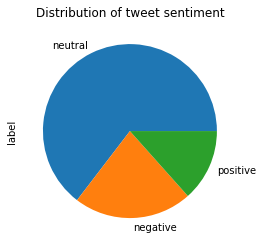

In [ ]:
df1 = df['label'].value_counts()
#fig = px.pie(df1, values='label', names='label', color_discrete_map=['silver', 'blue', 'red'])
#fig.show()
fig = df1.plot(kind='pie')
fig.set_title('Distribution of tweet sentiment')
#df1.head(5)

In [ ]:
df.head(5)

,tweets,timestamp,translated,clean_tweets,sentiment,label,created_at_hour
0,bado kuna mtu ana dai kuni corn na mpesa balan...,2023-02-21 06:12:07,There is still someone who has a claim for cor...,still someone claim corn balance 235 fellowken...,0,negative,2023-02-21 06:00:00
1,@KenyaPower_Care Meter No:54607520928\nError 0...,2023-02-21 06:11:47,@KenyaPower_Care Meter No:54607520928\nError 0...,meter 54607520928 error 06 connects fails 0712...,0,negative,2023-02-21 06:00:00
2,@Safaricom_Care check Dm,2023-02-21 06:09:27,@Safaricom_Care check Dm,check dm,1,neutral,2023-02-21 06:00:00
3,"Safaricom Ethiopia: ""We are in discussions wit...",2023-02-21 06:06:24,"Safaricom Ethiopia: ""We are in discussions wit...",safaricom ethiopia discussions ministry financ...,1,neutral,2023-02-21 06:00:00
4,@Safaricom_Care It's a very poor decision made...,2023-02-21 06:06:05,@Safaricom_Care It's a very poor decision made...,poor decision made come relocation done busine...,0,negative,2023-02-21 06:00:00


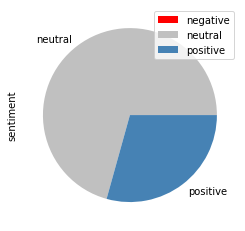

In [ ]:
colors = ['red', 'silver', 'steelblue']
df.groupby(['label']).sum().plot(kind='pie', y='sentiment', colors=colors)

In [ ]:
df1 = df.groupby(['label'])
df1.head(5)

,tweets,timestamp,translated,clean_tweets,sentiment,label,created_at_hour
0,bado kuna mtu ana dai kuni corn na mpesa balan...,2023-02-21 06:12:07,There is still someone who has a claim for cor...,still someone claim corn balance 235 fellowken...,0,negative,2023-02-21 06:00:00
1,@KenyaPower_Care Meter No:54607520928\nError 0...,2023-02-21 06:11:47,@KenyaPower_Care Meter No:54607520928\nError 0...,meter 54607520928 error 06 connects fails 0712...,0,negative,2023-02-21 06:00:00
2,@Safaricom_Care check Dm,2023-02-21 06:09:27,@Safaricom_Care check Dm,check dm,1,neutral,2023-02-21 06:00:00
3,"Safaricom Ethiopia: ""We are in discussions wit...",2023-02-21 06:06:24,"Safaricom Ethiopia: ""We are in discussions wit...",safaricom ethiopia discussions ministry financ...,1,neutral,2023-02-21 06:00:00
4,@Safaricom_Care It's a very poor decision made...,2023-02-21 06:06:05,@Safaricom_Care It's a very poor decision made...,poor decision made come relocation done busine...,0,negative,2023-02-21 06:00:00
5,@Biancawamu2 Haki walai hata wale wa kuuza mko...,2023-02-21 06:04:45,"@Biancawamu2 Haki walai, even those who sell s...",haki walai even sell safaricom loans still cal...,1,neutral,2023-02-21 06:00:00
6,@SangKip4 @VinceChepkwony Subscription imeisha...,2023-02-21 06:04:29,@SangKip4 @VinceChepkwony Subscription has end...,subscription ended like safaricom data,1,neutral,2023-02-21 06:00:00
7,@Safaricom_Care Big heads!,2023-02-21 06:00:24,@Safaricom_Care Big heads!,big heads,1,neutral,2023-02-21 06:00:00
9,@SafaricomPLC \n@Safaricom_Care \n\nServices o...,2023-02-21 05:59:03,@SafaricomPLC\n@Safaricom_Care\n\nServices of ...,services mpesa agents locked notice given acti...,0,negative,2023-02-21 06:00:00
10,@SafaricomPLC l have moved to that area 3 year...,2023-02-21 05:58:21,@SafaricomPLC l have moved to that area 3 year...,l moved area 3 years ago problem since signal,0,negative,2023-02-21 06:00:00


In [ ]:
df.iloc[983]["tweets"] #selecting  specific row or column from the data set

'@Safaricom_Care How long should this take?'

In [ ]:
df.iloc[983]["translated"]

'@Safaricom_Care How long should this take?'